In [2]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

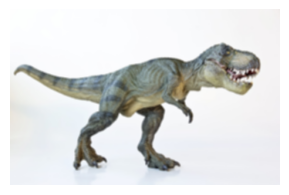

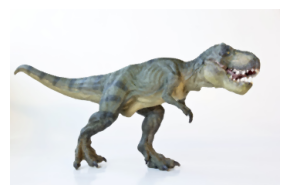

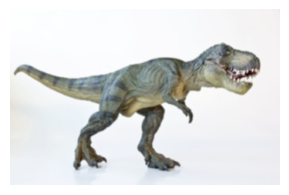

In [18]:
filename = os.path.join("..", "..", "cds-vis-data", "data", "img", "trex.png")

image = cv2.imread(filename)

show(cv2.blur(image, (3,3))) # needs a tuple of values *avarge blur

show(cv2.medianBlur(image, 3)) # needs just the value (int)

show(cv2.GaussianBlur(image, (3,3), 0))


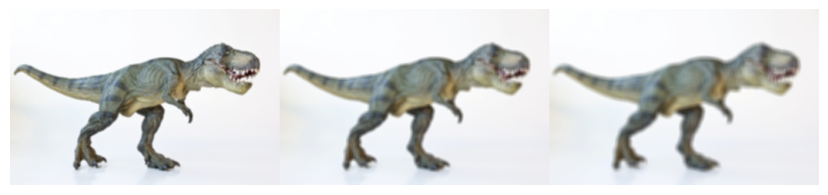

In [20]:
blurred_stack = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7)),
])

show(blurred_stack)

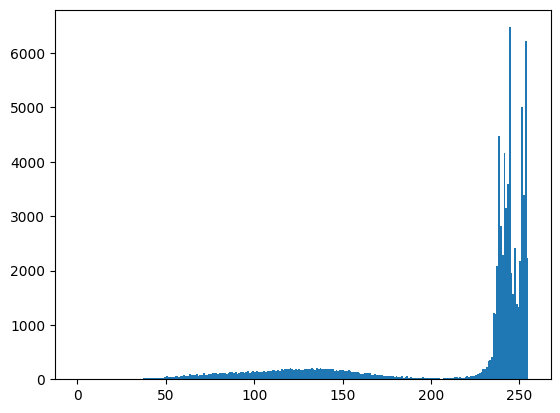

In [26]:
# Tresholding

image = cv2.imread(filename) # reload the image again to prevent changes to influence the new

grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.hist(grey.flatten(), 255) # end value determines the how the pixels are grouped
plt.show()

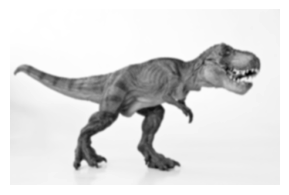

In [29]:
blurred = cv2.GaussianBlur(grey, (5,5), 0)
show_channel(blurred)

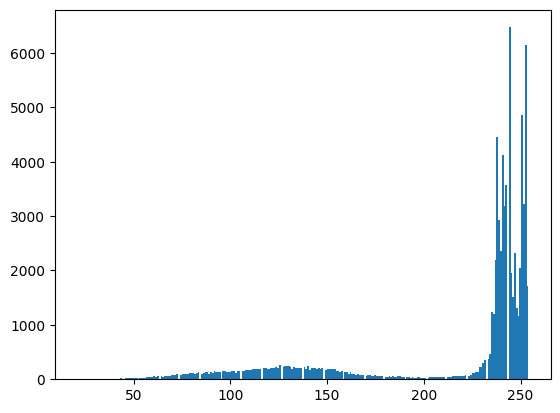

In [30]:
# blurred image hist
plt.hist(blurred.flatten(), 255) 
plt.show()

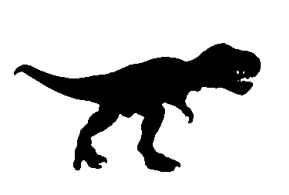

In [39]:
binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
# type(cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY))

""" the array in the tuble contains the binary values 0 or 255 eventhough we only see 255 """

show_channel(binary_image[1])


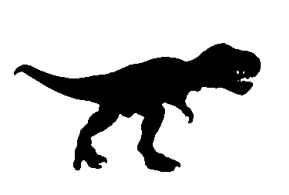

In [42]:
 _ ,binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY) # assigns it to to variables howver the first one is empthy
# type(cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY))

# the array in the tuble contains the binary values 0 or 255 eventhough we only see 255

show_channel(binary_image)

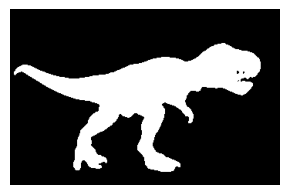

In [44]:
cv2.bitwise_not(binary_image) # inverts the numbers in the array

show_channel(cv2.bitwise_not(binary_image))

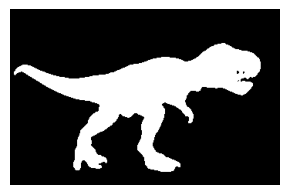

In [46]:
# another way to invert the image
_ ,binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV) 

show_channel(binary_image)

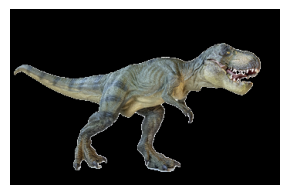

In [48]:
cv2.bitwise_and(image, image, mask = binary_image)

show(cv2.bitwise_and(image, image, mask = binary_image))

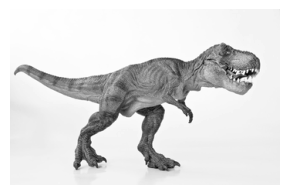

In [52]:
#Sobel 
show_channel(grey)


In [54]:

Sobel_horizontal = cv2.Sobel(grey, cv2.CV_64F, 1, 0) # the second parameter defines the datatype (64 bit floating point number)
Sobel_vertical = cv2.Sobel(grey, cv2.CV_64F, 0, 1)

print(Sobel_horizontal)
print(Sobel_vertical)

[[  0.   0.   0. ...  -4. -34.   0.]
 [  0.   0.   0. ...  -4. -27.   0.]
 [  0.   0.   0. ...  -5. -18.   0.]
 ...
 [  0.   0.   1. ...   0.   0.   0.]
 [  0.   0.   2. ...   0.   0.   0.]
 [  0.   0.   2. ...   0.   0.   0.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  7. 14.]
 [ 0.  0.  0. ...  3.  4.  6.]
 ...
 [ 0.  0.  1. ...  4.  4.  4.]
 [ 4.  4.  4. ...  4.  4.  4.]
 [ 0.  0.  0. ...  0.  0.  0.]]


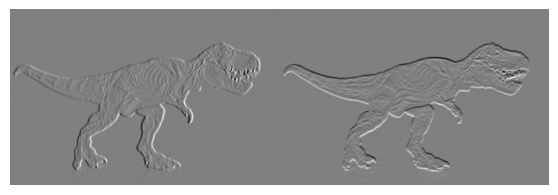

In [56]:
edges = np.hstack([
    Sobel_horizontal,
    Sobel_vertical
])

show_channel(edges)

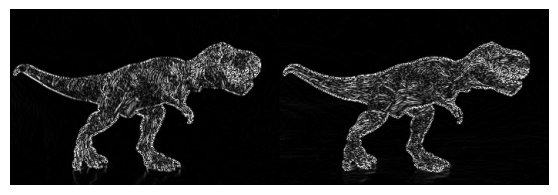

In [57]:
Sobel_horizontal = np.uint8(np.absolute(Sobel_horizontal))
Sobel_vertical = np.uint8(np.absolute(Sobel_vertical))

edges = np.hstack([
    Sobel_horizontal,
    Sobel_vertical
])

show_channel(edges)